# Flight Price Prediction

Anyone who has booked a flight ticket knows how unexpectedly the prices vary. The cheapest available ticket on a given flight gets more and less expensive over time. This usually happens as an attempt to maximize revenue based on - 1. Time of purchase patterns (making sure last-minute purchases are expensive) 2. Keeping the flight as full as they want it (raising prices on a flight which is filling up in order to reduce sales and hold back inventory for those expensive last-minute expensive purchases) So, you have to work on a project where you collect data of flight fares with other features and work to make a model to predict fares of flights.

I have collected 1829 flight details from easemytrip.com for August 5th 2022

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('flight_price.xlsx')
df.head(5)

,Unnamed: 0,airline,flight_number,source,Destination,start_time,end_time,duration,no_of_stops,price
0,0,SpiceJet,SG- 768,Bangalore,Delhi,13:30,23:20,09h 50m,1-stop,"9,677"
1,1,SpiceJet,SG- 516,Bangalore,Delhi,09:35,19:45,10h 10m,1-stop,"9,677"
2,2,SpiceJet,SG- 516,Bangalore,Delhi,09:35,04:40,19h 05m,1-stop,"9,677"
3,3,SpiceJet,SG- 516,Bangalore,Delhi,09:35,08:45,23h 10m,1-stop,"9,677"
4,4,SpiceJet,SG- 768,Bangalore,Delhi,13:30,15:05,25h 35m,1-stop,"9,677"


# EDA

In [3]:
df.columns

Index(['Unnamed: 0', 'airline', 'flight_number', 'source', 'Destination',
       'start_time', 'end_time', 'duration', 'no_of_stops', 'price'],
      dtype='object')

In [4]:
df.shape

(1829, 10)

we have 1829 rows and 10 columns.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1829 entries, 0 to 1828
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     1829 non-null   int64 
 1   airline        1829 non-null   object
 2   flight_number  1829 non-null   object
 3   source         1829 non-null   object
 4   Destination    1829 non-null   object
 5   start_time     1829 non-null   object
 6   end_time       1829 non-null   object
 7   duration       1829 non-null   object
 8   no_of_stops    1829 non-null   object
 9   price          1730 non-null   object
dtypes: int64(1), object(9)
memory usage: 143.0+ KB


All columns have object data type. Here we can drop Unnamed: 0 as it does not contribute in predicting price

In [6]:
df = df.drop('Unnamed: 0', axis=1)

In [7]:
df.columns

Index(['airline', 'flight_number', 'source', 'Destination', 'start_time',
       'end_time', 'duration', 'no_of_stops', 'price'],
      dtype='object')

Now let's replace unnecessary ',', '-' with ''

In [8]:
df['price'] = df['price'].str.replace(',','')
df['price']

0        9677
1        9677
2        9677
3        9677
4        9677
        ...  
1824    24321
1825    24321
1826    24323
1827    24323
1828    25822
Name: price, Length: 1829, dtype: object

In [9]:
df['no_of_stops'] = df['no_of_stops'].str.split('-',expand=True)[0]

In [10]:
df['no_of_stops']

0        1
1        1
2        1
3        1
4        1
        ..
1824     1
1825     1
1826     1
1827     1
1828    2+
Name: no_of_stops, Length: 1829, dtype: object

In [11]:
df['price'] = pd.to_numeric(df['price'])


we can drop start_time and end_time as we have duration which is sufficient to predict flight price

In [12]:
df.isnull().sum()

airline           0
flight_number     0
source            0
Destination       0
start_time        0
end_time          0
duration          0
no_of_stops       0
price            99
dtype: int64

In [13]:
collist = df.columns.values

for i in collist:
    print(f"Unique values of {i} is {df[i].unique()}\n")

Unique values of airline is ['SpiceJet' 'Air India' 'AirAsia' 'Vistara' 'GO FIRST' 'Indigo'
 'AllianceAir']

Unique values of flight_number is ['SG- 768' 'SG- 516' 'SG-3023' 'SG- 327' 'SG- 493' 'AI-804' 'SG- 536'
 'I5-1533' 'UK-806' 'G8- 873' 'G8- 544' 'G8- 118' '6E-2401' '6E-6247'
 '6E-5021' '6E-2186' '6E- 871' 'G8- 241' 'G8- 320' 'G8- 801' '6E- 484'
 '6E-6753' '6E-6317' '6E-6404' '6E- 978' '6E- 486' '6E- 886' '6E- 408'
 '6E-6802' '6E- 469' '6E- 405' 'AI-505' '6E-2514' '6E- 869' 'I5-741'
 'I5-749' 'I5-722' 'UK-810' 'UK-808' '6E-6042' '6E-2147' '6E-6067'
 'I5-1731' 'I5-819' 'I5-818' 'I5-386' 'I5-974' 'I5-1453' 'I5-942'
 'I5-1982' 'I5-1426' 'I5-1780' 'I5-1622' 'I5-1452' 'I5-1576' '6E-2053'
 '6E- 537' '6E- 735' '6E- 638' '6E- 684' 'UK-816' '6E-2174' '6E-5025'
 'I5-1528' 'UK-818' '6E-6491' 'UK-897' 'UK-814' 'UK-820' 'UK-802'
 'SG- 136' 'SG-3008' 'AI-501' 'G8- 803' 'UK-551' 'UK-846' 'UK-858'
 'UK-915' 'UK-553' 'AI-640' 'AI-604' 'AI-610' 'UK-852' 'UK-657' 'UK-866'
 '6E- 528' 'UK-867' '6E-61

In [14]:
collist = df.columns.values

for i in collist:
    print(f"Value count of {i} is {df[i].value_counts()}\n")

Value count of airline is Vistara        685
Air India      430
Indigo         427
AirAsia        111
SpiceJet        92
GO FIRST        81
AllianceAir      3
Name: airline, dtype: int64

Value count of flight_number is UK-872     35
AI-543     33
AI-559     30
UK-897     28
UK-706     27
           ..
6E-6818     1
6E- 738     1
6E- 488     1
6E-5351     1
6E-6211     1
Name: flight_number, Length: 605, dtype: int64

Value count of source is Bangalore    470
Hyderabad    463
Kolkata      348
Delhi        329
Mumbai       132
Goa           87
Name: source, dtype: int64

Value count of Destination is Mumbai     570
Chennai    493
Goa        393
Delhi      281
Kolkata     92
Name: Destination, dtype: int64

Value count of start_time is 07:10    62
07:00    56
06:40    49
08:30    45
07:30    40
         ..
21:30     1
23:55     1
12:30     1
00:20     1
15:10     1
Name: start_time, Length: 222, dtype: int64

Value count of end_time is 12:45    59
20:15    50
23:35    47
22:20    42
21:2

we can replace non with 0 in no_of_stops and 2+ with 2

In [15]:
df['no_of_stops'] = df['no_of_stops'].str.replace('non','0')
df['no_of_stops'] = df['no_of_stops'].str.replace('+','')

In [16]:
df['no_of_stops'].value_counts()

1    1398
0     233
2     198
Name: no_of_stops, dtype: int64

In [17]:
df['no_of_stops'] = df['no_of_stops'].astype(int)

In [18]:
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1829 entries, 0 to 1828
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   airline        1829 non-null   object        
 1   flight_number  1829 non-null   object        
 2   source         1829 non-null   object        
 3   Destination    1829 non-null   object        
 4   start_time     1829 non-null   datetime64[ns]
 5   end_time       1829 non-null   datetime64[ns]
 6   duration       1829 non-null   object        
 7   no_of_stops    1829 non-null   int32         
 8   price          1730 non-null   float64       
dtypes: datetime64[ns](2), float64(1), int32(1), object(5)
memory usage: 121.6+ KB


In [20]:
df.head(5)

,airline,flight_number,source,Destination,start_time,end_time,duration,no_of_stops,price
0,SpiceJet,SG- 768,Bangalore,Delhi,2022-08-01 13:30:00,2022-08-01 23:20:00,09h 50m,1,9677.0
1,SpiceJet,SG- 516,Bangalore,Delhi,2022-08-01 09:35:00,2022-08-01 19:45:00,10h 10m,1,9677.0
2,SpiceJet,SG- 516,Bangalore,Delhi,2022-08-01 09:35:00,2022-08-01 04:40:00,19h 05m,1,9677.0
3,SpiceJet,SG- 516,Bangalore,Delhi,2022-08-01 09:35:00,2022-08-01 08:45:00,23h 10m,1,9677.0
4,SpiceJet,SG- 768,Bangalore,Delhi,2022-08-01 13:30:00,2022-08-01 15:05:00,25h 35m,1,9677.0


In [21]:
Difference = (df['end_time'] - df['start_time'])
Difference_list = list()
for i in range(len(Difference)):
    duration = Difference.iloc[i].seconds/3600
    Difference_list.append(duration)
df['Duration'] = Difference_list

In [22]:
df = df.drop(['duration'],axis=1)

In [23]:
df['depature_hour'] = pd.to_datetime(df['start_time']).dt.hour
df['depature_minute'] = pd.to_datetime(df['start_time']).dt.minute
df['arrival_hour'] = pd.to_datetime(df['end_time']).dt.hour
df['arrival_minute'] = pd.to_datetime(df['end_time']).dt.minute

In [24]:
df = df.drop(['start_time','end_time'],axis=1)

In [25]:
df.head(5)

,airline,flight_number,source,Destination,no_of_stops,price,Duration,depature_hour,depature_minute,arrival_hour,arrival_minute
0,SpiceJet,SG- 768,Bangalore,Delhi,1,9677.0,9.833333,13,30,23,20
1,SpiceJet,SG- 516,Bangalore,Delhi,1,9677.0,10.166667,9,35,19,45
2,SpiceJet,SG- 516,Bangalore,Delhi,1,9677.0,19.083333,9,35,4,40
3,SpiceJet,SG- 516,Bangalore,Delhi,1,9677.0,23.166667,9,35,8,45
4,SpiceJet,SG- 768,Bangalore,Delhi,1,9677.0,1.583333,13,30,15,5


We can drop null values, as null values are in Target column only

In [26]:
df1 = df.dropna()

In [27]:
df1.isnull().sum()

airline            0
flight_number      0
source             0
Destination        0
no_of_stops        0
price              0
Duration           0
depature_hour      0
depature_minute    0
arrival_hour       0
arrival_minute     0
dtype: int64

In [28]:
df1.shape

(1730, 11)

flight_number, start_time,end_time column can be dropped as it does not contibute much in predicting price

In [29]:
df1 = df1.drop(['flight_number'],axis=1)

# Finding Categorical columns

In [30]:
col = df1.columns
num_col = df1._get_numeric_data().columns
cat_col = list(set(col)-set(num_col))
cat_col

['airline', 'source', 'Destination']

# plotting categorical column

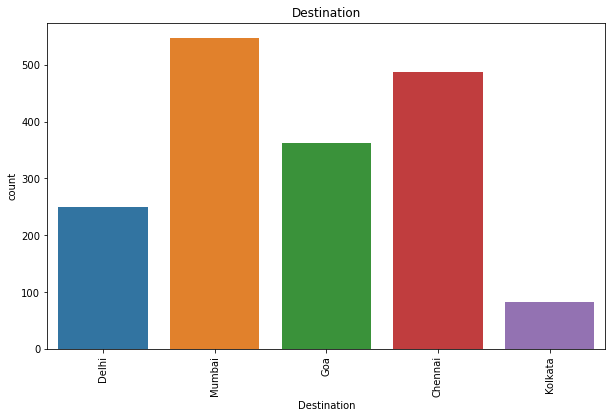

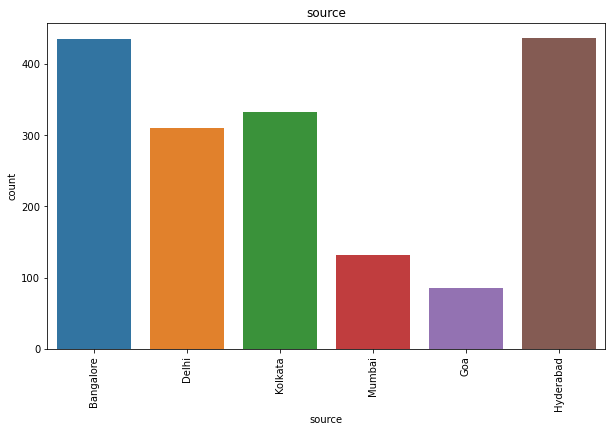

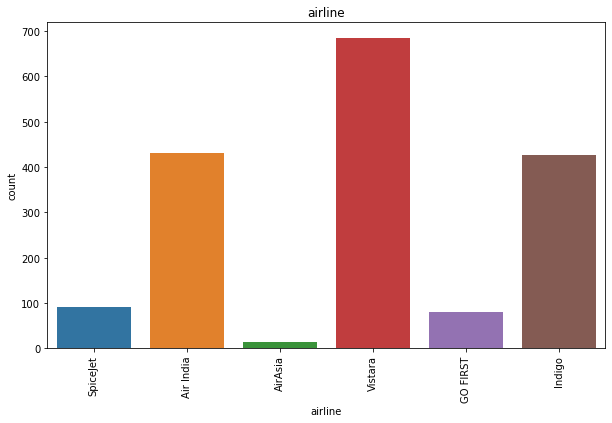

In [31]:
cols = ['Destination','source','airline']
for i in cols:
    plt.figure(figsize=(10,6))
    sns.countplot(x=df1[i],data=df1)
    plt.title(i)
    plt.xticks(rotation=90)
    plt.show()

Key Observation:

1. Many people travel from Mumbai and Chennai followed by Goa.
2. Destination is mostly in Bangalore followed by Hyderabad.
3. Vistara is mostly prefered airlines followed by AirIndia and Indigo

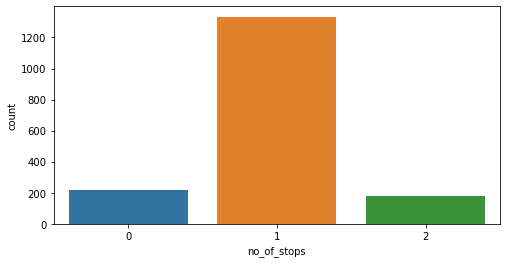

In [32]:
plt.figure(figsize=(8,4))
sns.countplot(df1['no_of_stops'])
plt.show()

1. Our dataset contains many one stop airplanes compared to non stop 

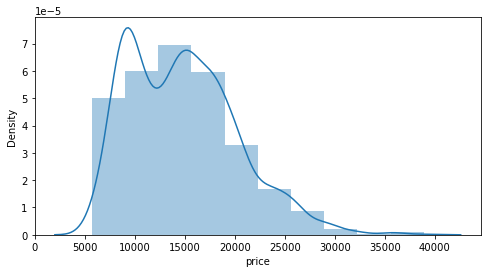

In [33]:
plt.figure(figsize=(8,4))
sns.distplot(df1['price'],bins=10)
plt.show()

Mostly the price ranges from 5000 to 20000 and it extends upto 40000

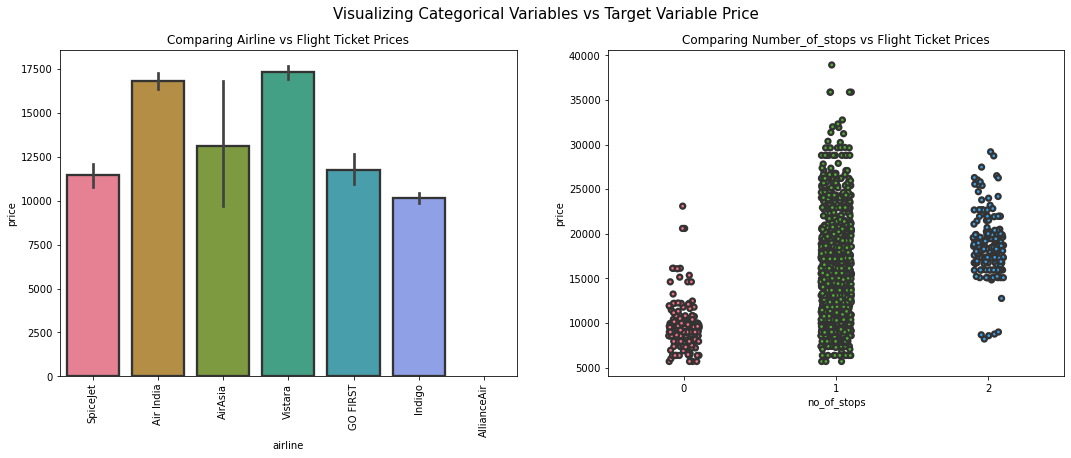

In [34]:
plt.figure(figsize = (18,6))
plt.suptitle("Visualizing Categorical Variables vs Target Variable Price",fontsize=15)

# Checking which Airline is expensive based on Price of tickets
plt.subplot(1,2,1)
plt.title("Comparing Airline vs Flight Ticket Prices")
sns.barplot(x= df['airline'],y= df['price'],palette = "husl",linewidth=2.3, edgecolor=".2")
plt.xticks(rotation = 90)

# Checking flights which have meals availability are expensive or not?
plt.subplot(1,2,2)
plt.title("Comparing Number_of_stops vs Flight Ticket Prices")
sns.stripplot(x = df['no_of_stops'],y= df['price'],palette = "husl",linewidth=2.3, edgecolor=".2")
plt.show()

Key Observations:

1. Airline vs Price: From the bar plot we can notice "Vistara" and "Air India" airlines have highest ticket prices compared to other airlines.
2. Number_of_stops vs Price: From the strip plot we can notice the flights which have 1 stop between source and destination have highest ticket prices compared to others. 

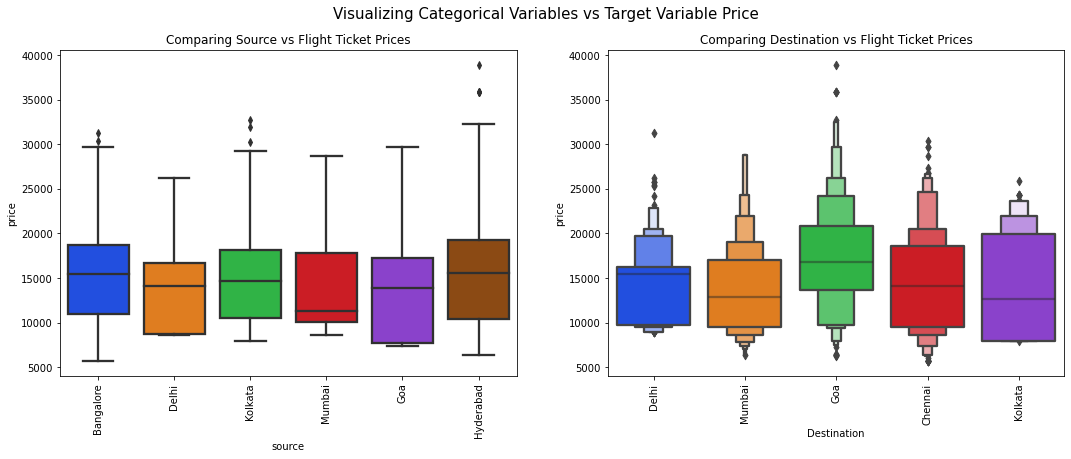

In [35]:
plt.figure(figsize = (18,6))
plt.suptitle("Visualizing Categorical Variables vs Target Variable Price\n",fontsize=15)

# Checking which source has highest ticket price
plt.subplot(1,2,1)
plt.title("Comparing Source vs Flight Ticket Prices")
sns.boxplot(x= df['source'],y= df['price'],palette = "bright",linewidth=2.3)
plt.xticks(rotation = 90)

# Checking how prices changes in each destination 
plt.subplot(1,2,2)
plt.title("Comparing Destination vs Flight Ticket Prices")
sns.boxenplot(x = df['Destination'],y= df['price'],palette = "bright",linewidth=2.3)
plt.xticks(rotation = 90)
plt.show()

Key Observations:


1. Source vs Price : From the box plot we can observe the flights from Hyderabad are having somewhat higher prices compared to other sources.
2. Destination vs Price: From the boxen plot we can notice that the flights travelling to Goa have higher flight ticket prices.

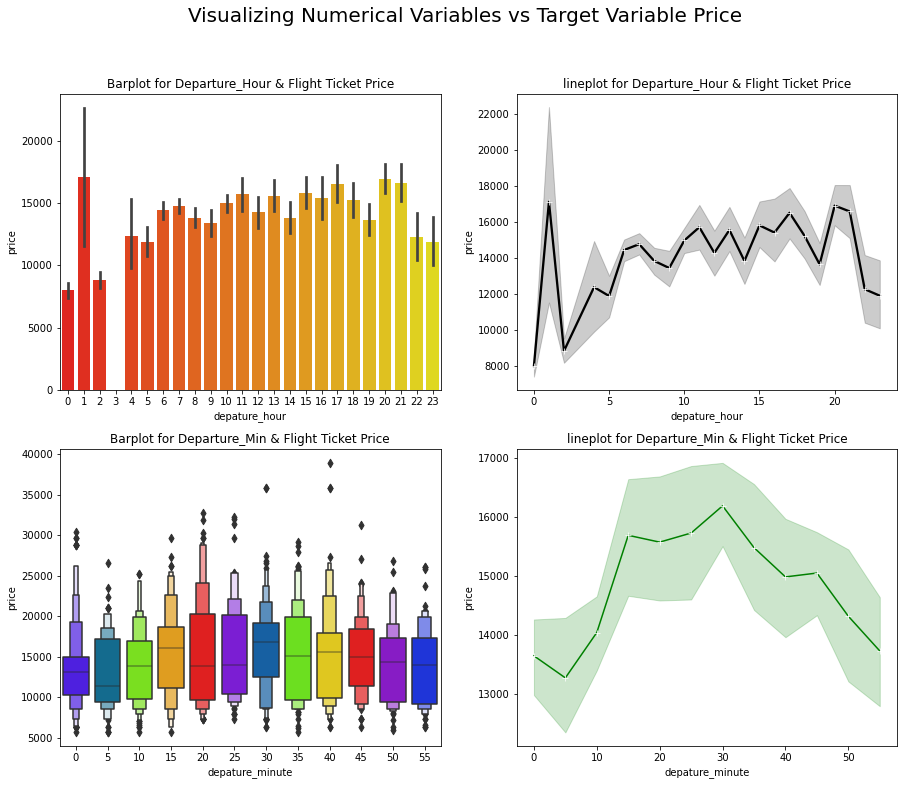

In [36]:
plt.figure(figsize = (15,12))
plt.suptitle("Visualizing Numerical Variables vs Target Variable Price",fontsize=20)

plt.subplot(2,2,1)
plt.title("Barplot for Departure_Hour & Flight Ticket Price")
sns.barplot(x= df['depature_hour'],y= df['price'],palette = "autumn",linewidth=2.3)

plt.subplot(2,2,2)
plt.title("lineplot for Departure_Hour & Flight Ticket Price")
sns.lineplot(x = df['depature_hour'],y= df['price'],marker="+",color='k',linewidth=2.3)

plt.subplot(2,2,3)
plt.title("Barplot for Departure_Min & Flight Ticket Price")
sns.boxenplot(x='depature_minute',y='price',data=df,palette = "prism",color='k')

plt.subplot(2,2,4)
plt.title("lineplot for Departure_Min & Flight Ticket Price")
sns.lineplot(x='depature_minute',y='price',data=df,marker="+",color='g')

plt.show()

Key Observations:

1. Departure_Hour vs Price: From the bar plot and line plot we can see that there are some flights departing in the early morning 1 AM having most expensive ticket prices compared to late morning flights. We can also observe the flight ticket prices are higher during afternoon (may fluctuate) and it decreases in the evening.
2. Departure_Min vs Price: The boxen plot and line plot gives there is no significant difference between price and departure min.

# Data Pre-processing

converting categorical data to numeric using Label Encoder

In [37]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in cat_col:
    df1[i] = le.fit_transform(df1[i])

# Describe

In [38]:
df1.describe()

,airline,source,Destination,no_of_stops,price,Duration,depature_hour,depature_minute,arrival_hour,arrival_minute
count,1730.000000,1730.000000,1730.000000,1730.000000,1730.000000,1730.000000,1730.000000,1730.000000,1730.000000,1730.000000
mean,3.035260,2.182659,1.971676,0.975145,14820.539306,9.626156,12.139306,24.771676,14.689017,28.179191
std,1.989104,1.691041,1.608180,0.478534,5451.073188,6.311507,5.275160,17.053565,6.025332,16.662097
min,0.000000,0.000000,0.000000,0.000000,5689.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,1.000000,9970.000000,4.666667,7.000000,10.000000,10.000000,15.000000
50%,3.000000,3.000000,2.000000,1.000000,14412.000000,8.333333,11.000000,25.000000,15.000000,25.000000
75%,5.000000,4.000000,4.000000,1.000000,18162.000000,14.166667,17.000000,40.000000,20.000000,45.000000
max,5.000000,5.000000,4.000000,2.000000,38918.000000,23.916667,23.000000,55.000000,23.000000,55.000000


Key Observations:

1. The counts of every column is same which means there are no missing values present in the dataset.
2. The mean value is greater than the median(50%) in the columns Duration, Number_of_stops, and Price so we can say these columns are skewed to right.
3. The median(50%) is bit greater than mean in Departure_Hour, Departure_Min, Arrival_Hour, Arrival_Hour and Arrival_Min which means these columns are skewed to left.
4. From the description we can say the minimum price of the flight ticket is Rs.3362.00 and maximum price is Rs.5689.00 also the mean is 14820.53.
5. In summarizing the data we can observe that there is huge difference in maximum and 75% percentile in the columns price duration, etc that means outliers present in these columns. These differences can also be seen in other columns. So we need to remove outliers and skewness to get better model and prediction.

# Correlation

In [39]:
df1.corr()

,airline,source,Destination,no_of_stops,price,Duration,depature_hour,depature_minute,arrival_hour,arrival_minute
airline,1.000000,0.026111,-0.013790,0.037379,0.043111,-0.036511,0.028139,0.168950,0.065146,0.068426
source,0.026111,1.000000,-0.220767,0.129976,0.012799,0.109823,0.021070,-0.055611,-0.006342,0.033672
Destination,-0.013790,-0.220767,1.000000,-0.129430,-0.063405,-0.037018,0.033122,0.009887,0.059197,-0.160248
no_of_stops,0.037379,0.129976,-0.129430,1.000000,0.418225,0.386281,-0.098981,0.012770,0.026604,0.007377
price,0.043111,0.012799,-0.063405,0.418225,1.000000,0.387286,0.106854,0.060245,0.121710,0.046914
Duration,-0.036511,0.109823,-0.037018,0.386281,0.387286,1.000000,0.107078,-0.009210,-0.063362,0.039801
depature_hour,0.028139,0.021070,0.033122,-0.098981,0.106854,0.107078,1.000000,0.003568,-0.061651,0.005717
depature_minute,0.168950,-0.055611,0.009887,0.012770,0.060245,-0.009210,0.003568,1.000000,0.017039,0.041738
arrival_hour,0.065146,-0.006342,0.059197,0.026604,0.121710,-0.063362,-0.061651,0.017039,1.000000,-0.144857
arrival_minute,0.068426,0.033672,-0.160248,0.007377,0.046914,0.039801,0.005717,0.041738,-0.144857,1.000000


<AxesSubplot:>

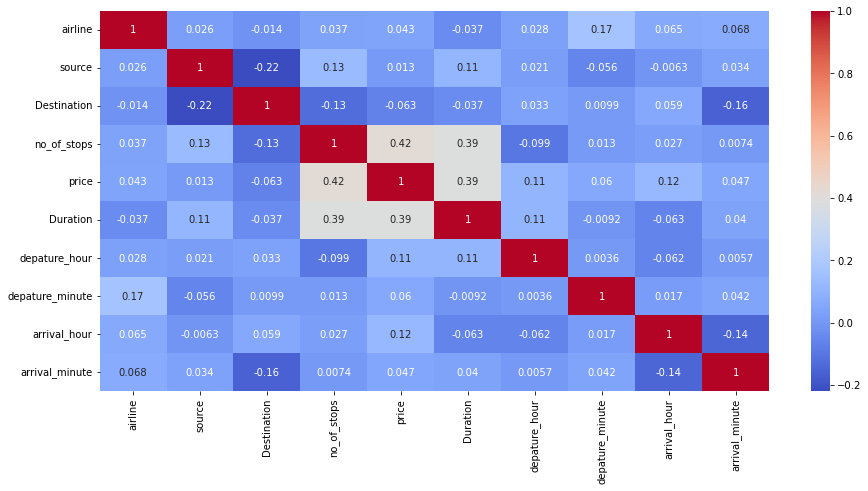

In [40]:
plt.figure(figsize=(15,7))
sns.heatmap(df1.corr(),annot=True,cmap='coolwarm')

Key Observations:

1. no_of_stops and duration are positively correlated with Target colum(price)
2. Destination is negatively correlated with target column.

Text(0.5, 1.0, 'correlation with target variable')

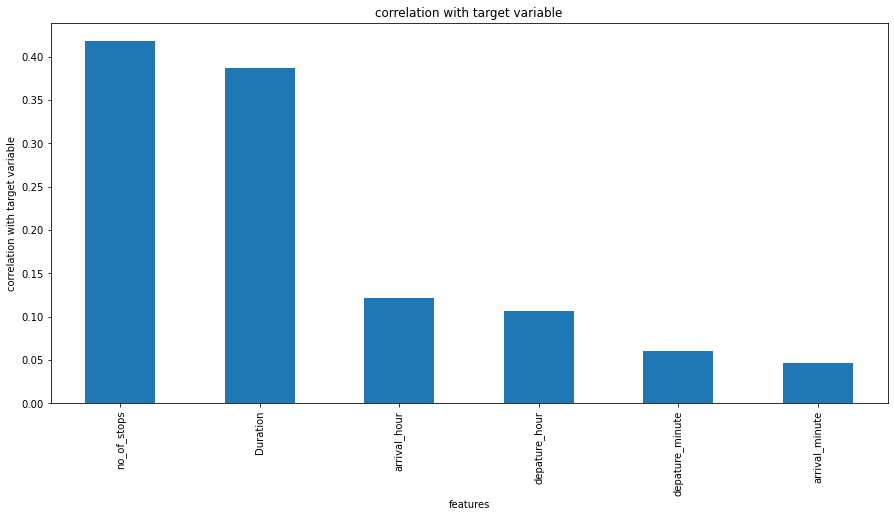

In [41]:
plt.figure(figsize=(15,7))
df.corr()['price'].sort_values(ascending=False).drop(['price']).plot.bar()
plt.xlabel("features")
plt.ylabel("correlation with target variable")
plt.title("correlation with target variable")

Key Observations:

As number of stops and duration decreases the price also increases.

All other variables arrival_hour, depature_hour, depature_minute, arrival_minute are positively correlated with target variable

# Skewness:

In [42]:
x = df1.drop(['price'],axis=1)
y = df1['price']

In [43]:
df1.skew()

airline           -0.512286
source             0.017495
Destination        0.095366
no_of_stops       -0.071072
price              0.679240
Duration           0.533848
depature_hour      0.323017
depature_minute    0.104122
arrival_hour      -0.484233
arrival_minute     0.022154
dtype: float64

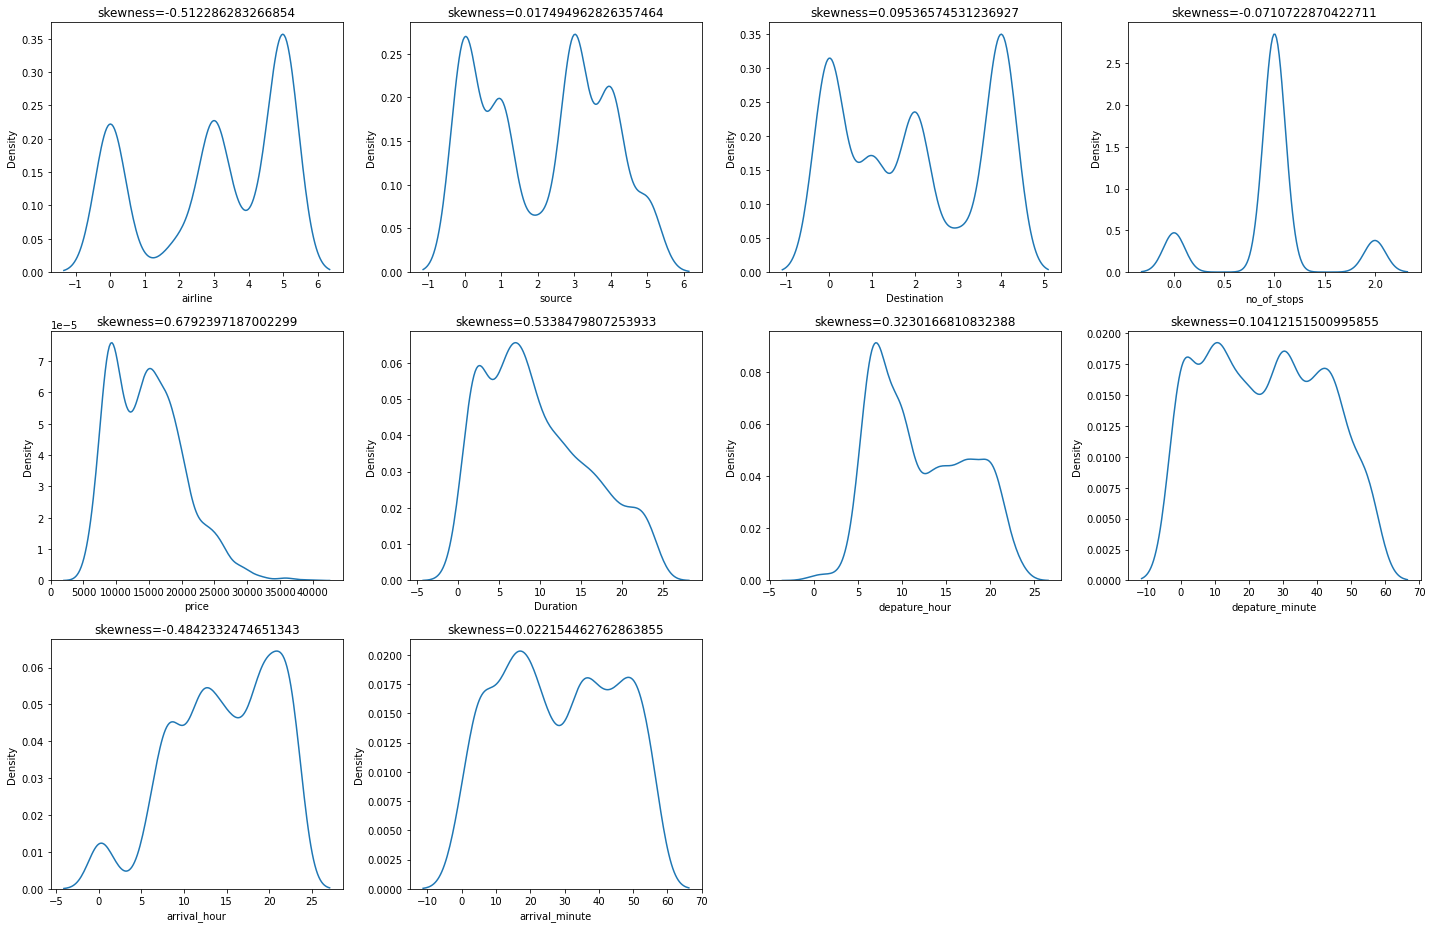

In [44]:
collist = df1.columns.values
plt.figure(figsize=(20,13))

for i in range(0,len(collist)):
    plt.subplot(3,4,i+1)
    sns.kdeplot(df1[collist[i]])
    plt.title(f"skewness={df1[collist[i]].skew()}")
    plt.tight_layout()

Keeping +/- 0.5 as skew value we can find no skewness is present in data.

# Outliers:

airline               AxesSubplot(0.125,0.657941;0.168478x0.222059)
source             AxesSubplot(0.327174,0.657941;0.168478x0.222059)
Destination        AxesSubplot(0.529348,0.657941;0.168478x0.222059)
no_of_stops        AxesSubplot(0.731522,0.657941;0.168478x0.222059)
price                 AxesSubplot(0.125,0.391471;0.168478x0.222059)
Duration           AxesSubplot(0.327174,0.391471;0.168478x0.222059)
depature_hour      AxesSubplot(0.529348,0.391471;0.168478x0.222059)
depature_minute    AxesSubplot(0.731522,0.391471;0.168478x0.222059)
arrival_hour             AxesSubplot(0.125,0.125;0.168478x0.222059)
arrival_minute        AxesSubplot(0.327174,0.125;0.168478x0.222059)
dtype: object

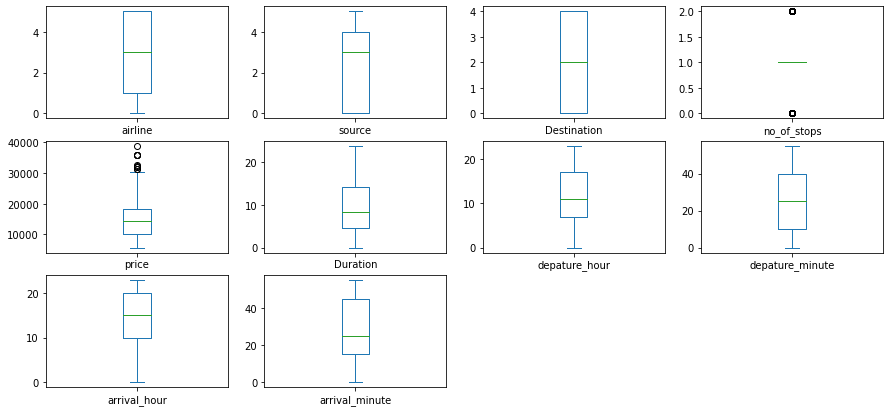

In [45]:
df1.plot(kind='box',subplots='True',layout=(3,4),figsize=(15,7))

# Key Observations:

Outliers are present in no_of_stops column

In [46]:
from scipy.stats import zscore
z = np.abs(zscore(x))
threshold = 3
x_new = x[(z<3).all(axis=1)]

In [47]:
print("Old dataframe : ",x.shape[0])
print("New Dataframe : ",x_new.shape[0])
print("Rows Dropped : ",x.shape[0]-x_new.shape[0])

Old dataframe :  1730
New Dataframe :  1730
Rows Dropped :  0


we have no outliers present in our dataset.

# Scaling:

In [48]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = pd.DataFrame(sc.fit_transform(x),columns=x.columns)

# Multicolinearity:

In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['Features'] = x.columns
vif

,VIF,Features
0,1.045979,airline
1,1.073589,source
2,1.093935,Destination
3,1.236511,no_of_stops
4,1.222986,Duration
5,1.041650,depature_hour
6,1.034696,depature_minute
7,1.038046,arrival_hour
8,1.055193,arrival_minute


all values are less than 5 so no multicolinearity is present and no need to remove any columns

# Training the data

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from sklearn.model_selection import cross_val_score, cross_val_predict

In [51]:
X.shape

(1730, 9)

In [52]:
y.shape

(1730,)

In [53]:
acc = 0

for i in range(0,1000):
    x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=i,test_size=.30)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    pred_y = lr.predict(x_test)
    temp = r2_score(y_test,pred_y)
    if temp>acc:
        acc = temp
        best_rstate = i
print("Accuracy Score : ", acc*100,"Random State : ",best_rstate)
        

Accuracy Score :  34.06470604982038 Random State :  276


In [54]:
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=276,test_size=.30)

In [55]:
from sklearn.linear_model import Ridge,Lasso,ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor

In [56]:
lr = LinearRegression()
la = Lasso()
ri = Ridge()
el = ElasticNet()
kn = KNeighborsRegressor()
svr = SVR()
dt = DecisionTreeRegressor()
rfr = RandomForestRegressor()
ada = AdaBoostRegressor()
gbr = GradientBoostingRegressor()
xgb = XGBRegressor()

model = [lr,la,ri,el,kn,svr,dt,rfr,ada,gbr,xgb]

In [57]:
score = []
mean_squared_err = []
mean_absolute_err = []
r2 = []

for m in model:
    m.fit(x_train,y_train)
    m.score(x_test,y_test)
    predm = m.predict(x_test)
    print("Accuracy Score of ",m," is ",m.score(x_train,y_train))
    score.append(m.score(x_train,y_train))
    
    print("Mean Squared Error is ",mean_squared_error(y_test,predm))
    mean_squared_err.append(mean_squared_error(y_test,predm))
    print("Mean Absolute error is ",mean_absolute_error(y_test,predm))
    mean_absolute_err.append(mean_absolute_error(y_test,predm))
    print("R2 Score is ",r2_score(y_test,predm))
    r2.append(r2_score(y_test,predm))
    print("\n\n")

Accuracy Score of  LinearRegression()  is  0.2478018282595661
Mean Squared Error is  18098610.298981544
Mean Absolute error is  3363.9737999209638
R2 Score is  0.3406470604982038



Accuracy Score of  Lasso()  is  0.2478015262606016
Mean Squared Error is  18097946.634757105
Mean Absolute error is  3363.960088377232
R2 Score is  0.3406712385400532



Accuracy Score of  Ridge()  is  0.24780169103046246
Mean Squared Error is  18098513.56820031
Mean Absolute error is  3364.046641415179
R2 Score is  0.340650584510484



Accuracy Score of  ElasticNet()  is  0.22494808376240016
Mean Squared Error is  18956931.86093775
Mean Absolute error is  3513.0211959580474
R2 Score is  0.30937743064460976



Accuracy Score of  KNeighborsRegressor()  is  0.6639473109968183
Mean Squared Error is  12809053.962851638
Mean Absolute error is  2629.48978805395
R2 Score is  0.5333516085973397



Accuracy Score of  SVR()  is  -0.0023407849688064086
Mean Squared Error is  27321254.745828442
Mean Absolute error is  

# Cross Validation:

In [58]:
mean_score = []
std = []

for m in model:
    CV = cross_val_score(m,X,y,cv=5)
    print("Score of ", m ," is ",CV)
    print("Mean Score is ",CV.mean())
    mean_score.append(CV.mean())
    print("Standard Deviation is ",CV.std())
    std.append(CV.std())
    print("\n")

Score of  LinearRegression()  is  [0.03955413 0.23023852 0.26881082 0.19296977 0.23354596]
Mean Score is  0.19302384019645955
Standard Deviation is  0.08040347660107508


Score of  Lasso()  is  [0.03995973 0.23012071 0.26899633 0.19315835 0.23358129]
Mean Score is  0.19316328226636814
Standard Deviation is  0.08027633194549011


Score of  Ridge()  is  [0.03972816 0.23020053 0.26890221 0.19304976 0.23353812]
Mean Score is  0.19308375617520834
Standard Deviation is  0.08034996753989346


Score of  ElasticNet()  is  [0.07988779 0.20075965 0.26790247 0.19973931 0.20853496]
Mean Score is  0.19136483527010054
Standard Deviation is  0.06121821406302606


Score of  KNeighborsRegressor()  is  [-0.21882474  0.11193382  0.00377547  0.19918414  0.36683787]
Mean Score is  0.09258131101406561
Standard Deviation is  0.19586502747400014


Score of  SVR()  is  [-0.10007352 -0.00478313 -0.00697583 -0.01794598 -0.03407567]
Mean Score is  -0.03277082628915777
Standard Deviation is  0.0352131334248613


Sc

In [59]:
myList = [round(x,2) for x in  mean_score]

Regression_result = pd.DataFrame({"MODEL": model,
                                  "SCORE": score,
                                  "CV_mean_score": myList,
                                  "CV_STD": std,
                                  "MAE": mean_absolute_err,
                                  "MSE": mean_squared_err,
                                  
                                  "R2":r2 
                                 })
Regression_result.sort_values(by="CV_mean_score", ascending=False)

,MODEL,SCORE,CV_mean_score,CV_STD,MAE,MSE,R2
7,"(DecisionTreeRegressor(max_features='auto', ra...",0.952871,0.33,0.129867,2192.528768,9.092818e+06,0.668738
9,([DecisionTreeRegressor(criterion='friedman_ms...,0.732320,0.33,0.105408,2516.703552,1.081032e+07,0.606168
10,"XGBRegressor(base_score=0.5, booster='gbtree',...",0.989286,0.27,0.207118,2128.348421,8.863217e+06,0.677103
8,"(DecisionTreeRegressor(max_depth=3, random_sta...",0.482658,0.26,0.171947,3576.464623,1.783375e+07,0.350296
0,LinearRegression(),0.247802,0.19,0.080403,3363.973800,1.809861e+07,0.340647
1,Lasso(),0.247802,0.19,0.080276,3363.960088,1.809795e+07,0.340671
2,Ridge(),0.247802,0.19,0.080350,3364.046641,1.809851e+07,0.340651
3,ElasticNet(),0.224948,0.19,0.061218,3513.021196,1.895693e+07,0.309377
4,KNeighborsRegressor(),0.663947,0.09,0.195865,2629.489788,1.280905e+07,0.533352
5,SVR(),-0.002341,-0.03,0.035213,4321.621828,2.732125e+07,0.004656


# HyperTuning

In [60]:
from sklearn.model_selection import GridSearchCV

In [61]:
param_grid = [{"n_estimators":[10,20,30,55,100],
              "max_features":["auto","sqrt","log2"]}]
rf = RandomForestRegressor(random_state=42)

In [62]:
reg_grid = GridSearchCV(rf,param_grid,n_jobs=-1,cv=5)

In [63]:
reg_grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid=[{'max_features': ['auto', 'sqrt', 'log2'],
                          'n_estimators': [10, 20, 30, 55, 100]}])

In [64]:
reg_grid.best_score_

0.6714588702590605

In [65]:
reg_grid.best_estimator_

RandomForestRegressor(random_state=42)

In [66]:
reg_final_model = reg_grid.best_estimator_
pred = cross_val_predict(reg_final_model,x_train,y_train,cv=5,n_jobs=-1)


In [67]:
reg_final_model.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

In [68]:
reg_final_model.score(x_train,y_train)

0.9527738653074965

we get 95% accuracy with RandomForestRegressor after hypertuning

# Saving best Model

In [69]:
import joblib
joblib.dump(reg_final_model,'Flight_Price_Prediction.obj')

['Flight_Price_Prediction.obj']

In [70]:
model = joblib.load('Flight_Price_prediction.obj')
prediction = model.predict(x_test)

In [73]:
predicted_flight_price = pd.DataFrame([model.predict(x_test)[:],y_test[:]],index=["Predicted","Actual"])
predicted_flight_price

,0,1,2,3,4,5,6,7,8,9,...,509,510,511,512,513,514,515,516,517,518
Predicted,18269.591667,17239.12,10890.11,18219.64,15709.04,9707.24,17482.17,8950.42,11276.97,16167.1,...,16740.3,15705.23,18159.04,15110.69,10050.88,9882.28,12068.07,8228.41,11162.25,10954.1
Actual,19237.000000,13305.00,9679.00,14145.00,19444.00,8568.00,19444.00,8580.00,9972.00,12934.0,...,16940.0,14990.00,19969.00,14990.00,8419.00,7942.00,14957.00,7737.00,10220.00,8566.0


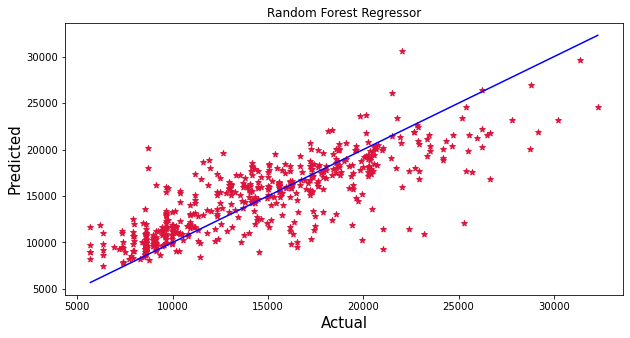

In [75]:
# Visualizing actual and predicted values
plt.figure(figsize=(10,5))
plt.scatter(y_test, prediction, c='crimson',marker="*")
p1 = max(max(prediction), max(y_test))
p2 = min(min(prediction), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual', fontsize=15)
plt.ylabel('Predicted', fontsize=15)
plt.title("Random Forest Regressor")
plt.show()